# Introductory Session
**Introduction to Machine / Deep / Reinforcement Learning Workshop**
Master X-ITE

Author: Jérémie Jakubowicz

## Data

In [1]:
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


After signing in at [kaggle.com](https://kaggle.com), let us download a json file named `kaggle.json` containing our credentials by clicking

My Account > Create new API token

as shown in the image below:

![screenshot from Ankush Choubey medium blog post](https://miro.medium.com/max/2000/1*9c2c7mpf_nj9px8aYNop4g.png)

Then, let's upload this file in `colab`, as shown in the images below:

<img src="https://cartan.int-evry.fr/Screenshots/ColabSelectFile.png" alt="File Tab" width=340px height=200px style="align:left;"/>
<img src="https://cartan.int-evry.fr/Screenshots/ColabImportFile.png" alt="Import File" width=380px height=200px style="align:center;"/>
<img src="https://cartan.int-evry.fr/Screenshots/ImportKaggleJson.png" alt="Import File" width=280px height=200px style="align:right;"/>

and move it to a hidden directory `.kaggle` on the notebook server, changing filesystem permissions so that other users than its owner cannot access it, using the bash lines below:

In [2]:
%%bash
if ! [ -d ~/.kaggle ]; then
    mkdir ~/.kaggle
fi
if ! [ -f ~/.kaggle/kaggle.json ]; then
    mv kaggle.json ~/.kaggle/
    chmod 600 ~/.kaggle/kaggle.json
fi

Then you need to connect to https://www.kaggle.com/c/givemesomecredit/rules and accept the terms of the competition

<img src='https://cartan.int-evry.fr/Screenshots/CompetitionTerms.png' alt='Competition Terms'/>

In [3]:
!kaggle competitions download GiveMeSomeCredit

  0% 0.00/5.16M [00:00<?, ?B/s]
100% 5.16M/5.16M [00:00<00:00, 131MB/s]


Let's check that files `cs-test.csv` and `cs-training.csv` correponding respectively to test and training set -- concepts to be discussed later -- are indeed well downloaded, after quietly (option `-q`) unzipping them, and removing zip archives:

In [4]:
%%bash
unzip -q \*.zip; rm *.zip
mv Data\ Dictionary.xls DataDictionary.xls
ls

cs-test.csv
cs-training.csv
DataDictionary.xls
kaggle.json
sample_data
sampleEntry.csv


## Discovering the data


In [27]:
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')

In [6]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)

datapath = "."
dictionary = "DataDictionary.xls"
datadictf = os.path.join(datapath, dictionary)
pd.ExcelFile(datadictf).parse('Sheet1')

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,Variable Name,Description,Type
1,SeriousDlqin2yrs,Person experienced 90 days past due delinquency or worse,Y/N
2,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits,percentage
3,age,Age of borrower in years,integer
4,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days past due but no worse in the last 2 years.,integer
5,DebtRatio,"Monthly debt payments, alimony,living costs divided by monthy gross income",percentage
6,MonthlyIncome,Monthly income,real
7,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards),integer
8,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or more past due.,integer
9,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans including home equity lines of credit,integer


In [7]:
trainf = "cs-training.csv"
dataf = os.path.join(datapath, trainf)

pd.read_csv(dataf)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [8]:
pd.read_csv(dataf, index_col=0)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


One can see that there are 150,000 rows and 11 columns in the dataframe

## Type checking

In [9]:
train = pd.read_csv(dataf, index_col=0)
train.dtypes

SeriousDlqin2yrs                        int64  
RevolvingUtilizationOfUnsecuredLines    float64
age                                     int64  
NumberOfTime30-59DaysPastDueNotWorse    int64  
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans         int64  
NumberOfTimes90DaysLate                 int64  
NumberRealEstateLoansOrLines            int64  
NumberOfTime60-89DaysPastDueNotWorse    int64  
NumberOfDependents                      float64
dtype: object

All these types are perfectly compatible with the data description, `NumberOfDependents` excepted, which is supposed to have type `int` and has type `float`.

Let us investigate why, looking at first rows

In [10]:
train['NumberOfDependents'].head()

1    2.0
2    1.0
3    0.0
4    0.0
5    0.0
Name: NumberOfDependents, dtype: float64

There seems to be a simple explanation: integers were appended a ".0" suffix making them look like floating point numbers. Let us check this explanation on all data using the `value_counts` method

In [11]:
train['NumberOfDependents'].value_counts()

0.0     86902
1.0     26316
2.0     19522
3.0     9483 
4.0     2862 
5.0     746  
6.0     158  
7.0     51   
8.0     24   
10.0    5    
9.0     5    
20.0    1    
13.0    1    
Name: NumberOfDependents, dtype: int64

Pandas is able to automatically detect these cast opportunities:

In [12]:
train = train.convert_dtypes()

Since this type discrepancy `int` vs `float` did not have a strong impact on what follows, we could have as well ignored this issue. Let's check again types to be sure that everything looks fine now:

In [13]:
train.dtypes

SeriousDlqin2yrs                        Int64  
RevolvingUtilizationOfUnsecuredLines    Float64
age                                     Int64  
NumberOfTime30-59DaysPastDueNotWorse    Int64  
DebtRatio                               Float64
MonthlyIncome                           Int64  
NumberOfOpenCreditLinesAndLoans         Int64  
NumberOfTimes90DaysLate                 Int64  
NumberRealEstateLoansOrLines            Int64  
NumberOfTime60-89DaysPastDueNotWorse    Int64  
NumberOfDependents                      Int64  
dtype: object

## Missing data

We would like to know if there are some missing data. We can rely on the `count` method

In [14]:
train.shape

(150000, 11)

In [15]:
train.count()

SeriousDlqin2yrs                        150000
RevolvingUtilizationOfUnsecuredLines    150000
age                                     150000
NumberOfTime30-59DaysPastDueNotWorse    150000
DebtRatio                               150000
MonthlyIncome                           120269
NumberOfOpenCreditLinesAndLoans         150000
NumberOfTimes90DaysLate                 150000
NumberRealEstateLoansOrLines            150000
NumberOfTime60-89DaysPastDueNotWorse    150000
NumberOfDependents                      146076
dtype: int64

We see that two columns have missing data: `MonthlyIncome` and `NumberOfDependents`

We will learn later various strategies that we can leverage to deal with missing data. In this session, we will not care.

## Naive scoring

In order to submit our first entry, we will try to come up with a quick scoring strategy. Here, we do not aim at performance, we just want to close the loop from downloading the data to our first submit as quickly as possible.

We first get the test dataset which we are supposed to score.

In [16]:
test = pd.read_csv(os.path.join(datapath,'cs-test.csv'), index_col=0)

In [17]:
print("Number of lines: {}".format(test.shape[0]))
test.count()

Number of lines: 101503


SeriousDlqin2yrs                        0     
RevolvingUtilizationOfUnsecuredLines    101503
age                                     101503
NumberOfTime30-59DaysPastDueNotWorse    101503
DebtRatio                               101503
MonthlyIncome                           81400 
NumberOfOpenCreditLinesAndLoans         101503
NumberOfTimes90DaysLate                 101503
NumberRealEstateLoansOrLines            101503
NumberOfTime60-89DaysPastDueNotWorse    101503
NumberOfDependents                      98877 
dtype: int64

Debt ratio is commonly used creterion by bankers to tell apart risky lines from low-risk lines. Here we try to use it as a raw score. With this scoring strategy, the highest the debt ratio, the highest the credit is at risk.

Since there are no missing data in the `DebtRatio` column we can use it as is.

In [18]:
score = test['DebtRatio']

We do not want to take a hard decision: accept or reject but rather sort the lines from the less risky to the most risky, according to our score. This score can be seen as a *soft* decision.

In order to understand how we should format our entry, let us have a look at the provided sample `sampleEntry.csv`

In [19]:
!head sampleEntry.csv

Id,Probability
1,0.080806647
2,0.040718741
3,0.011968341
4,0.067639933
5,0.108263859
6,0.027519732
7,0.04729395
8,0.041027039
9,0.00422303


We see the header mentions a Probability, so we renormalize our score to have a score between 0 and 1.

In [20]:
prob = (score - score.min())/score.max()

In [21]:
prob.to_csv('naiveEntry.csv', index_label='Id', header=['Probability'])

In [22]:
!head naiveEntry.csv

Id,Probability
1,6.615561555719534e-07
2,1.964911816223549e-06
3,2.562731610056424e-06
4,3.4508792923533314e-06
5,7.422771926686195e-08
6,1.2761691561756967e-06
7,0.003905696801651722
8,1.375827165462907e-06
9,0.0075430632886861505


In [ ]:
!kaggle competitions submit -f naiveEntry.csv -m "Naive entry based on sole DebtRatio" GiveMeSomeCredit

100% 2.67M/2.67M [00:00<00:00, 10.3MB/s]
Successfully submitted to Give Me Some Credit

In [ ]:
!kaggle competitions submissions GiveMeSomeCredit

fileName                date                 description                                         status    publicScore  privateScore  
----------------------  -------------------  --------------------------------------------------  --------  -----------  ------------  
naiveEntry.csv          2021-07-07 11:38:03  Naive entry based on sole DebtRatio                 pending   None         None          
boostingEntry.csv       2020-10-22 17:23:02  Entry based on boosting                             complete  0.86089      0.86684       
logisticEntry.csv       2020-10-22 17:20:07  Entry based on logistic regression                  complete  0.70287      0.69674       
logisticEntry.csv       2020-10-08 17:14:44  Entry based on logistic regression                  complete  0.70488      0.69831       
blendingEntry.csv       2020-10-06 08:55:25  Entry based on a random forests and boosting blend  complete  0.86087      0.86666       
randomforestsEntry.csv  2020-10-06 08:49:52  Entry base

Well done! We have just submitted our first entry in this competition. Our `AUC` is $0.52192$. Is this a good AUC?

Two ways to answer.

First way is to look at our rank on the *leaderboard*: we are 900 among 924. Not so good -- but it is only a beginning, we will have other sessions, let us not loose faith (yet).

Second is to understand AUC a little bit better. Let's do that now.

# Supervised ML main concepts -- the binary classification case

In [29]:
import numpy as np
import matplotlib.pyplot as plt

## Terminology

The **training dataset** consists of $n$ couples $(x_i, y_i)$ where $1\leq i\leq n$ is an index and $n$ is the number of data points. Oftentimes, $x_i$ is called **feature** and $y_i$ is called **target**. All $x_i$ belongs to some common space $\mathcal{X}$ called **feature space**, and likewise, all $y_i$ belong to some common space $\mathcal{Y}$ expectedly called the **target space**.

In [23]:
xtrain = train.iloc[:,1:]
ytrain = train.iloc[:,0]

Let's have a look at $x_1, \dots, x_5$

In [24]:
xtrain.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,0.766127,45,2,0.802982,9120,13,0,6,0,2
2,0.957151,40,0,0.121876,2600,4,0,0,0,1
3,0.65818,38,1,0.085113,3042,2,1,0,0,0
4,0.23381,30,0,0.03605,3300,5,0,0,0,0
5,0.907239,49,1,0.024926,63588,7,0,1,0,0


So we see, that:
$$
\begin{align}
x_1 &= (0.766127, 45, 2, 0.802982, 9120.0, 13, 0, 6, 0, 2.0)&\in\mathbb{R}^{10}\\
x_2 &= (0.957151, 40, 0, 0.121876, 2600.0, 4, 0, 0, 0, 1.0)&\in\mathbb{R}^{10}\\
x_3 &= (0.658180, 38, 1, 0.085113, 3042.0, 2, 1, 0, 0, 0.0)&\in\mathbb{R}^{10}\\
x_4 &= (0.233810, 30, 0, 0.036050, 3300.0, 5, 0, 0, 0, 0.0)&\in\mathbb{R}^{10}\\
x_5 &= (0.907239, 49, 1, 0.024926, 63588.0, 7, 0, 1, 0, 0.0)&\in\mathbb{R}^{10}
\end{align}
$$ 

Here the feature space $\mathcal{X}$ is $\mathbb{R}^{10}$ and the target space $\mathcal{Y}$ is $\{0,1\}$:

In [25]:
ytrain.head()

1    1
2    0
3    0
4    0
5    0
Name: SeriousDlqin2yrs, dtype: Int64

When $\mathcal{Y}$:
* is a finite set, we speak of a **classification train set**
* is a set containing two elements, we speak of a **binary classification train set**
* is contained in $\mathbb{R}$, we speak of a **regression train set**

Otherwise, we just speak of a **prediction train set** or just a **train set**. 

So here, with the [Give Me Some Credit](https://kaggle.com/c/GiveMeSomeCredit) competition, we have a **binary classification train set**.

A **data point** denotes the couple $(x,y)\in\mathcal{X}\times\mathcal{Y}$. Sometimes the space $\mathcal{X}\times\mathcal{Y}$ is denoted $\mathcal{Z}$ and is called the **data space**. So, formally, a training set is just an element of $\mathcal{Z}^n$.

A mapping
$$h:\mathcal{X}\to\mathcal{Y}$$ is called:
- a **classifier**, for classification problems ($\mathcal{Y}$ finite)
- a **regressor**, for regression problems ($\mathcal{Y}\subset\mathbb{R}$)
- or simply a **predictor**, in the general case

We will later why, but we will restrict ourselves and not use just any predictor. The predictor set $\mathcal{H}$ we are allowed to use, is called a **model**. It's a different modelling act than in mathematical statistics where a model is a parametric family $\mathbb{P}_\theta$ of probability distributions.

** Machine Learning vs. Mathematical Statistics digression **

In machine learning, it is believed that there is a **underlying probability distribution** $\mathbb{P}$ on the data space $\mathcal{Z}$. It is also believed that this underlying probability distribution will never be known perfectly. Notice that, contrarily to mathematical statistics, this probability distribution is assumed to be *unique* and does not depend on any parameter. In machine learning, the parameter space, *i.e.* the model, is rather the set of predictors.

** End of digression **

***
A very important assumption in machine learning is that: $z_i = (x_i,y_i)$ have been sampled **independently** from each other and are **identically distributed** according to $\mathbb{P}$
***

## A powerful formalism

There are actually a lot of concrete problems that can be cast into this formalism.

A few examples:
  - Does an image contain a person?
  - Does this mammography represents a tumor?
  - Is this sentence an insult?
  - What is the digit represented in this image?
  - What category of product does this product description text corresponds to?
  - What is the gross domestic product of France going to be next year?
  - What is the probability that this user is going to click on this product?

## Loss and Risk

On what ground would some predictor be better than some other? Let's introduce an important concept: a **loss function** is any function:
$$l:(y,y')\in\mathcal{Y}\times\mathcal{Y}\mapsto l(y,y')\in\mathbb{R}$$

Popular examples include:
- The Hamming/binary loss: $l(y,y') = \begin{cases}0 &\text{ if }y=y'\\ 1& \text{ if }y\not=y'\end{cases}$
- The so-called $\ell^1$-loss: $l(y,y') = | y - y'|$ when $\mathcal{Y}\subset\mathbb{R}$
- The so-called quadratic loss: $l(y,y') = (y-y')^2$ when $\mathcal{Y}\subset\mathbb{R}$

We can then introduce the **risk** associated to a predictor $h$, denoted $R(h)$:
$$R(h) = \mathbb{E}l(h(X),Y)$$

And in the same vein, the risk associated to model $\mathcal{H}$:
$$R(\mathcal{H}) = \inf_{h\in\mathcal{H}}R(h)$$

***
Important remark: Let's keep in mind that since $\mathbb{P}$ is unknown, $R(h)$ is not accessible. It is a theoretical quantity that will not be computable in practice, but that will be key to understand **overfitting**
***

A related quantity is the so-called **empirical risk**
$$\hat R_n(h) = \frac1n\sum_{i=1}^nl(h(x_i),y_i)$$

Notice, that contrarily to $R(h)$, $\hat R_n(h)$ is easy to compute in practice, provided $l$ is easy to compute and $n$ is not too large. If $n$ is very large, $\hat R_n(h)$ might still computable thanks to *distributed computing* (ref. needed)

Likewise,
$$\hat R_n(\mathcal{H}) = \inf_{h\in\mathcal{H}}\hat R_n(h)$$
might be approximated in practice if $\mathcal{H}$ is not too complex, thanks to optimization algorithms

***
Notice that if $l$ is the binary loss, then $\hat R_n$ is simple to understand: it's simply the normalized number of predictions that are not perfect.
***

## Soft classifiers and associated losses

In the context of binary classification, there are some situations when we are more interested in using a **soft** predictor:
$$s:\mathcal{X}\to\mathbb{R}$$
than a **hard** one:
$$h:\mathcal{X}\to\mathcal{Y}=\{0,1\}$$

It is important to notice that it is always possible to transform a *soft* predictor into a *hard* one using a threshold:
$$h_t(x) = \begin{cases}
0 & \text{if } s(x)\leq t\\
1 & \text{otherwise}
\end{cases}
$$
This mapping shows that $s$ can be mapped to a whole family of *hard* classifiers $\{h_t: t\in\mathbb{R}\}$. And reciprocally, it is not complicated to see that $s$ can actually be recovered from $\{h_t: t\in\mathbb{R}\}$ through:
$$s(x) = \sup\{t: h_t(x) = 0\}$$
So there is a one to one mapping between $s$ and $\{h_t: t\in\mathbb{R}\}$.

However, the mapping $s\mapsto h_t$ for a *given* $t$ is *not* one to one. In general, there is a loss of information going from $s$ to some $h_t$. We cannot recover $s$ anymore, because we cannot deduce what would be the result of all other $h_{t'}$ for $t'\not=t$. In other terms, there is a destruction of information when thresholding a soft classifier into a hard classifier.

A natural way to measure the performance of $s$ therefore consists in choosing a threshold $t$ and using $l(h_t(x),y)$. As we saw, it is not fully satisfying since there is a loss of information when going from $s$ to $h_t$.

Luckily, there are some loss functions that are well adapted to *soft* predictors in the sense that do not imply to choose a threshold $t$ and use $h_t$ instead of $s$.

### Log-loss

When $s:\mathcal{X}\to[0,1]$ can be thought of as a probability, one can use for instance the $\log$-loss, **ll** that is the negative counterpart of the $\log$-likelihood of statistics:
$$ll(s) = -\sum_{i=1}^n\left[\log(1-s(x_i))\{y_i = 0\} + \log(s(x_i))\{y_i = 1\}\right]$$

### AUC

See below, section "Understanding the AUC"

## Overfitting

The celebrated [law of large numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers), tell us that $\hat R_n(h)$ tends to $R(h)$ when $n$ tends to infinity. However, that does *not* imply that $\hat R_n(\mathcal{H})$ tends to $R(\mathcal{H})$. Can you see why? [hint: expectation of an infimum is not always equal to infinimum of expectations]

In other terms, it might not always be a good idea to look for the best predictor in the sense of minimizing the empirical risk if one has in mind minimizing the (true) risk.

Let's check that with a little mind experiment

### Example

Assume that $X$ follows a [Gaussian distribution](https://en.wikipedia.org/wiki/Normal_distribution) and that *conditionally* to $X$, $Y$ follows a [Bernoulli distribution]() such that [*logistic model*]:
$$\mathbb{P}[Y=1\vert X=x] = \frac{\exp x}{1 + \exp x}$$

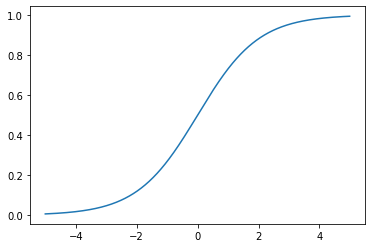

In [30]:
s = np.arange(-5,5,0.01)
plt.plot(s, 1./(1+np.exp(-s)))

# Images are centered
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

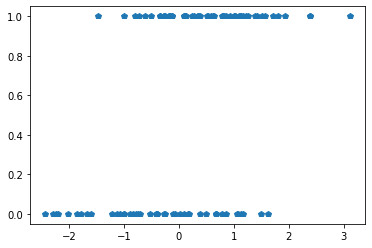

In [31]:
n = 100

def bool_to_int(y):
    if y:
        return 1
    else:
        return 0

toy_sample_x = np.random.normal(size=n)
toy_sample_y = [ bool_to_int(np.random.random() < 1/(1+np.exp(-x))) for x in toy_sample_x ]
plt.plot(toy_sample_x, toy_sample_y, "p")

Now assume that $\mathcal{H}$ is the set of all (measurable) functions $h:\mathbb{R}\to\{0,1\}$. Check that the minimum risk is achieved by the predictor:
$$
h^\star(x):\begin{cases}
1&\text{ if }x>0\\
0&\text{ otherwise }
\end{cases}
$$

Check also that:
$$R(\mathcal{H}) = \frac1{\sqrt{2\pi}}\int_{-\infty}^{\infty}\frac{\exp(-x^2/2)}{1+\exp(x)}dx > 0$$

But check that $\hat R_n(\mathcal{H}) = 0$.

Exercise: Do the same computations with $\mathcal{H}_{step} = \{h_t: t\in\mathbb{R}\}$ the set of step functions:

$$h_t(x):\begin{cases}
1 & \text{ if }x > t\\
0 & \text{ otherwise}
\end{cases}
$$

Another way to look at this is to think about a **game** between some **Player** and **Nature**. Nature draws some sample iid according to some probability distribution $\mathbb{P}$ and Player picks an $h\in\mathcal{H}$, then Player pays $\hat R_n(h)$ to Nature. Depending on who plays first, the amount Player will pay to Nature will change. Are you convinced?

So what to do? One can try to bound the gap between $R(\mathcal{H})$ and $\hat R_n(\mathcal{H})$ which is an important area of [Statistical Learning Theory](https://en.wikipedia.org/wiki/Statistical_learning_theory) linked to what is called [Model Selection](https://en.wikipedia.org/wiki/Model_selection).

But more practically, one can rely on a very simple tool called **cross validation**

## Cross validation

![Cross Validation Figure](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

## Understanding the AUC

Looking at the [competition's evaluation page](https://www.kaggle.com/c/GiveMeSomeCredit/overview/evaluation) we can see that the evaluation metric is the so-called [AUC](https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve).

It might look like a daunting mathematical metric, but it's not as complicated as it looks

Recall that for each line of the `cs-test.csv` file, we uploaded a score, named *Probability*. This score might be seen as a *soft decision*, as opposed to a *hard decision* that would consist in uploading either $1$, *i.e.* is considered a risky line, or $0$, *i.e.* is not considered as a risky line.

In other terms, rather than *directly deciding* which lines should be granted credit and which lines should not, we attributed them a *score*, that as it turns out, is a real number between $0$ and $1$ (but everything below would remain valid if it was any real number).

Of course, once the scores are computed, a threshold could be set, and it could be decided that all lines having a score greater than the threshold would have their credit declined. Therefore, using a threshold, a *soft* decision can become a *hard* one.

There are four types of  *hard* decisions:
  - Decline a credit that defaulted -> *true positive*
  - Accept a credit that went well -> *true negative*
  - Decline a credit that went well -> *false positive*
  - Accept a credit that defaulted -> *false negative*

Once the scores are computed, for a given threshold, one can compute the number of false positives *F*, and the number of true positives *T*. If we known the total number of actual defaults *P* and the total number of actual credits that went well *N*, we can deduce the false negatives $P - T$ and true negatives $N - F$. Therefore, if we known $N$ and $P$, we can deduce the numbers associated to the four types of hard decisions from $F$ and $T$. Normalized quantities $\frac{F}{N}$ and $\frac{T}{P}$ are called respectively the *false positive rate* and the *true positive rate*. These normalized quantities contain all the information to retrieve the four types of numbers, *provided we know the total number of actual negatives and positives*.

Now remember that in order to go from a soft decision to a hard one, we used a specific threshold. So if $t$ denotes the used threshold, we can plot the point:
$$\left(\frac{F(t)}{N}, \frac{T(t)}{P}\right)$$
where $F(t)$ and $T(t)$ denote respectively the number of false positive and true positive associated to threshold $t$.

When the threshold vary from the minimum value ($0$ in this case since all the values are in $[0,1]$) to the maximum value ($1$ in this case), we obtain a *curve*: the so-called *Receiver Operating Characteristic* (ROC) curve.

When $t$ is very high, there are no false positives since we need to be above $t$ to be declared positive, so $F(\infty)=0$. For the same reason, there are no true positive neither, so $T(\infty) = 0$. Reciprocally, one can check that $F(-\infty) = 1$ and $T(-\infty) = 1$. Actually, in our case we can restrict $t$ between $0$ and $1$, so $F(0) = T(0) = 1$ and $F(1) = T(1) = 0$. So the ROC curve goes from $(0,0)$ to $(1,1)$.

Now imagine that all scores are distinct and sorted from the highest one to the lowest one. As long as the threshold $t$ is higher than the highest one, we have $F(t) = T(t) = 0$ and when $t$ is lower than the lowest one we have $F(t) = T(t) = 1$. One can check that after $t$ takes a value that corresponds exactly to a given score, the curve makes a "jump", *i.e.* has a discontinuity: if the given score corresponds to a positive case, the curve jumps "up", while if the given score corresponds to a negative case, the curve jumps "right".

Somehow, there are three extreme *scenarii*, that are represented by three extreme ROC curves.


Scenario #1. 


In this scenario, the ROC curve starts going up from $(0,0)$ to $(0,1)$, and then right from $(0,1)$ to $(1,1)$. Considering what we understood about the ROC curve going up or right, it implies that there is a critical threshold $t_c$ such that all cases having a score greater than $t_c$ are actually positive cases, and all cases having a score less or equal than $t_c$ are actually negative cases.

Scenario #1


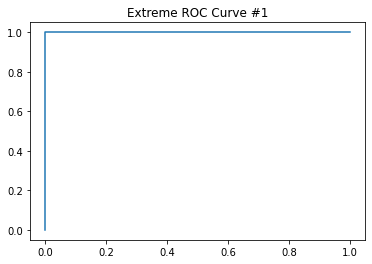

In [32]:
plt.plot([0, 0, 1], [0, 1, 1])
plt.title("Extreme ROC Curve #1")
print("Scenario #1")

This scenario is extreme in the sense that it implies that true positives are perfectly distinguishable from true negatives. This is never the case in practice.

Scenario #2.


This scenario is the symetrical twin of Scenario #1: ROC curve starts going right until it reaches $(1,0)$, and then up to $(1,1)$. It means that there exists a critical threshold $t_c$ such that all cases having a score greater than $t_c$ are negative cases. Those having a score less or equal than $t_c$ are positive cases.

Scenario #2


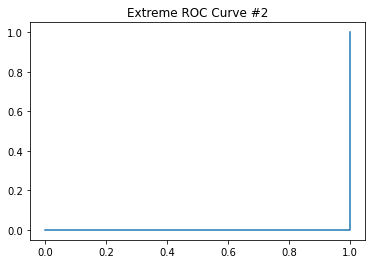

In [33]:
plt.plot([0, 1, 1], [0, 0, 1])
plt.title("Extreme ROC Curve #2")
print("Scenario #2")

For the same reason than Scenario #1, it is unrealistic to assume that negative cases (in this example, credits that will be reimbursed as planned) can be perfectly predicted and distinguished from positive cases (in this example, credits that will not be reimbursed as planned).

We would like to find a credit scoring such that: the highest its score is, the more likely a credit will likely encounter default. With this viewpoint, Scenario #1 is an ideal scenario where the scoring is so good that is can tell apart good credits from bad credits using a threshold $t_c$.

Scenario #2 is also ideal for the same reason, except that we should have used the opposite of the score to rank credit demands.

Scenario #3.

In this scenario, for half of the points, the ROC curve is going up, and for the other half, it is going right. Actually the proportion of points for which the ROC curve is going up is the positive rate (*i.e.* the proportion of positive cases). And likewise, the proportion of points for which the ROC curve is going right is the negative rate. So it is half only if there are as many positive cases as there are negative cases.


As opposed to the previous two scenarios, this scenario could happen in practice. And the ROC curve would approximately look like this:

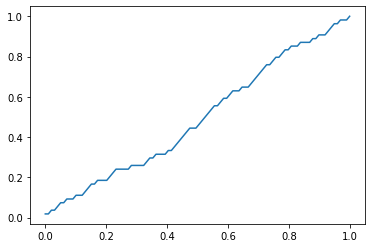

In [34]:
n = 100
x = np.linspace(0,1,n)
y = np.random.binomial(1,0.5,size=n)
plt.plot(x,np.cumsum(y)/sum(y))

![ROC Curve](https://scikit-learn.org/stable/_images/sphx_glr_plot_roc_001.png)

AUC = 0.5 corresponds to a random classifier